In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from pathlib import Path
from scipy.stats import t, norm
import seaborn as sns
%matplotlib inline

def flip_zscore(zscore, coeqtlallele, altaf, altallele):
    if not pd.isnull(zscore):
        if coeqtlallele == altallele:
            coeqtlaf = altaf
        else:
            coeqtlaf = 1 - altaf
        if coeqtlaf > 0.5:
            return -zscore
        else:
            return zscore
    else:
        return np.nan
    
def flip_allele(altaf, altallele, refallele):
    if altaf > 0.5:
        return refallele
    else:
        return altallele

In [2]:
coeqtl_withbios_prefix = Path(
    "./coeqtl_mapping/output"
)
filter_type = 'filtered_results'

def flip_direction(allele1, allele2, zscore2):
    if allele1 == allele2:
        return zscore2
    else:
        return -1*zscore2


def get_z_score(t_statistic, num):
    prob = t.cdf(t_statistic, num - 2)
    z_score = norm.ppf(prob)
    return z_score

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
color_dict = {'CD4T': '#2E9D33',
              'CD8T': 'darkgreen',
              'monocyte': '#EDBA1B',
              'NK': '#E64B50',
              'DC': '#965EC8',
              'B': '#009DDB',
              'cMono': 'peru',
              'ncMono': 'y',
              'CD4T_individual_100': '#2E9D33',
              'CD4T_individual_50': '#2E9D33',
              'CD4T_50': '#2E9D33',
              'CD4T_150': '#2E9D33',
              'CD4T_250': '#2E9D33'}

In [5]:
workdir = Path("./coeqtl_mapping/")
bios_replication_filtered_df = pd.read_csv(
    workdir/'bios/onlyRNAAlignMetrics_rmLLD/filtered_results/replication_summary.csv', 
    index_col=0
).set_index('celltype')

In [8]:
celltype = 'CD4T'
eqtldf = pd.read_csv(
    workdir/f'input/snp_selection/eqtl/UT_{celltype}_eQTLProbesFDR0.05-ProbeLevel_withAF.tsv',
    sep='\t'
    )
eqtldf['snp_eqtlgene'] = ['_'.join(item) for item in eqtldf[['SNPName', 'genename']].values]
eqtl_allele_af_df = eqtldf.drop_duplicates(subset=['snp_eqtlgene', 'AlleleAssessed', 'AF'])
eqtl_allele_af_dict = eqtl_allele_af_df.set_index('snp_eqtlgene')[['AlleleAssessed', 'AF', 'alt_allele', 'ref_allele']].T.to_dict()

In [50]:
biostype = 'onlyRNAAlignMetrics_rmLLD'
celltype = 'CD4T'
filter_type = 'filtered_results'

coeqtl_df = pd.read_csv(
    coeqtl_withbios_prefix/filter_type/f'UT_{celltype}/coeqtls_fullresults_fixed.sig.withbios{biostype}.tsv.gz',
    compression='gzip', 
    index_col=0, 
    sep='\t')
coeqtl_df = coeqtl_df.dropna(subset=['t_bios'])
coeqtl_df['zscore_bios'] = [get_z_score(item[0], item[1]) for item in 
                            coeqtl_df[['t_bios', 
                                       'num_individuals_bios']].values]
coeqtl_df['flipped_zscore_bios'] = [flip_direction(item[0], item[1], item[2]) for item in 
                                  coeqtl_df[['SNPEffectAllele', 
                                             'assessed_allele_bios',
                                             'zscore_bios']].values]

isConcordant = lambda x:True if x[0]*x[1] > 0 else False
coeqtl_df['is_concordant'] = [isConcordant(item) for item in 
                              coeqtl_df[['MetaPZ', 'flipped_zscore_bios']].values]



In [51]:
coeqtl_df

,snp_genepair,Gene,GeneChr,GenePos,GeneStrand,GeneSymbol,SNP,SNPChr,SNPPos,SNPAlleles,...,gene1_bios,gene2_bios,assessed_allele_bios,num_individuals_bios,isinteractionterm_bios,snp_genepair_bios,corrected_p_bios,zscore_bios,flipped_zscore_bios,is_concordant
snp_gene1_gene2,,,,,,,,,,,,,,,,,,,,,
rs7605824_SH3YL1_NPM1,rs7605824_NPM1;SH3YL1,NPM1;SH3YL1,2,217730,NaN,NPM1;SH3YL1,rs7605824,2,280819,G/A,...,SH3YL1,NPM1,A,2491.0,True,rs7605824_NPM1;SH3YL1,0.000000,-3.617874,-3.617874,True
rs7605824_SH3YL1_CD48,rs7605824_CD48;SH3YL1,CD48;SH3YL1,2,217730,NaN,CD48;SH3YL1,rs7605824,2,280819,G/A,...,SH3YL1,CD48,A,2491.0,True,rs7605824_CD48;SH3YL1,0.784422,-0.446946,-0.446946,True
rs7605824_SH3YL1_RPS13,rs7605824_RPS13;SH3YL1,RPS13;SH3YL1,2,217730,NaN,RPS13;SH3YL1,rs7605824,2,280819,G/A,...,SH3YL1,RPS13,A,2491.0,True,rs7605824_RPS13;SH3YL1,0.000000,-3.489377,-3.489377,True
rs7605824_SH3YL1_RPL31,rs7605824_RPL31;SH3YL1,RPL31;SH3YL1,2,217730,NaN,RPL31;SH3YL1,rs7605824,2,280819,G/A,...,SH3YL1,RPL31,A,2491.0,True,rs7605824_RPL31;SH3YL1,0.349601,-1.325633,-1.325633,True
rs7605824_SH3YL1_RPL3,rs7605824_RPL3;SH3YL1,RPL3;SH3YL1,2,217730,NaN,RPL3;SH3YL1,rs7605824,2,280819,G/A,...,SH3YL1,RPL3,A,2491.0,True,rs7605824_RPL3;SH3YL1,0.000000,-3.854851,-3.854851,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs4147638_SMDT1_ACTB,rs4147638_ACTB;SMDT1,ACTB;SMDT1,22,42475695,NaN,ACTB;SMDT1,rs4147638,22,42487900,G/A,...,SMDT1,ACTB,G,2491.0,True,rs4147638_ACTB;SMDT1,0.000000,-3.748326,3.748326,True
rs4147638_SMDT1_RPS25,rs4147638_RPS25;SMDT1,RPS25;SMDT1,22,42475695,NaN,RPS25;SMDT1,rs4147638,22,42487900,G/A,...,SMDT1,RPS25,G,2491.0,True,rs4147638_RPS25;SMDT1,0.000000,5.773036,-5.773036,True
rs4147638_SMDT1_RPS3A,rs4147638_RPS3A;SMDT1,RPS3A;SMDT1,22,42475695,NaN,RPS3A;SMDT1,rs4147638,22,42487900,G/A,...,SMDT1,RPS3A,G,2491.0,True,rs4147638_RPS3A;SMDT1,0.000000,4.434777,-4.434777,True


In [52]:
# flip direction according to AF
coeqtl_df['eqtl_effect_allele'] = [eqtl_allele_af_dict.get(eqtl)['AlleleAssessed'] for eqtl in 
                                       coeqtl_df['snp_eqtlgene']]
coeqtl_df['eqtl_alt_af'] = [eqtl_allele_af_dict.get(eqtl)['AF'] for eqtl in coeqtl_df['snp_eqtlgene']]
coeqtl_df['eqtl_alt_allele'] = [eqtl_allele_af_dict.get(eqtl)['alt_allele'] for eqtl in 
                                    coeqtl_df['snp_eqtlgene']]
coeqtl_df['eqtl_ref_allele'] = [eqtl_allele_af_dict.get(eqtl)['ref_allele'] for eqtl in 
                                    coeqtl_df['snp_eqtlgene']]
coeqtl_df[f'MetaPZ_flippedforAF'] = [flip_zscore(zscore, coeqtlallele, altaf, altallele)
                                                   for zscore, coeqtlallele, altaf, altallele in
                                                   coeqtl_df[[f'MetaPZ',
                                                                  f'SNPEffectAllele',
                                                                  'eqtl_alt_af',
                                                                  'eqtl_alt_allele']].values]
coeqtl_df[f'flipped_zscore_bios_flippedforAF'] = [flip_zscore(zscore, coeqtlallele, altaf, altallele)
                                                   for zscore, coeqtlallele, altaf, altallele in
                                                   coeqtl_df[[f'flipped_zscore_bios',
                                                                  f'SNPEffectAllele',
                                                                  'eqtl_alt_af',
                                                                  'eqtl_alt_allele']].values]

0.9637681159420289


Text(3, -5, 'Concordance = 0.96\nrb = 0.61')

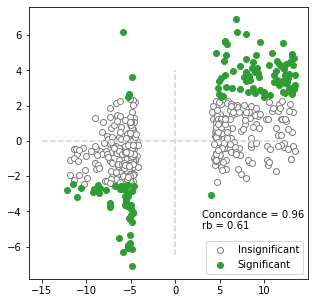

In [53]:
coeqtl_sig = coeqtl_df[coeqtl_df['corrected_p_bios']<=0.05]
coeqtl_nonsig = coeqtl_df[coeqtl_df['corrected_p_bios']>0.05]
plt.figure(figsize=(5, 5))
plt.scatter(coeqtl_nonsig['MetaPZ_flippedforAF'], 
            coeqtl_nonsig['flipped_zscore_bios_flippedforAF'], 
            label='Insignificant',
            edgecolor='gray',
            facecolor='white', alpha=1)
plt.scatter(coeqtl_sig['MetaPZ_flippedforAF'],
            coeqtl_sig['flipped_zscore_bios_flippedforAF'],  
            label='Significant',
            edgecolor=color_dict[celltype],
            facecolor=color_dict[celltype], alpha=1)
plt.plot([-15, 12], [0, 0], linestyle='--', color='lightgray')
plt.plot([0, 0], [-6.5, 4], linestyle='--', color='lightgray')
plt.legend()

concordance_rate = coeqtl_sig[coeqtl_sig['is_concordant']].shape[0] / coeqtl_sig.shape[0]
print(concordance_rate)

celltype_rb = bios_replication_filtered_df.loc[celltype]['r']
plt.text(3, -5, f'Concordance = {concordance_rate:.2f}\nrb = {celltype_rb:.2f}')

# plt.savefig('bios_replication.cd4t.filtered_results.pdf')

<AxesSubplot:>

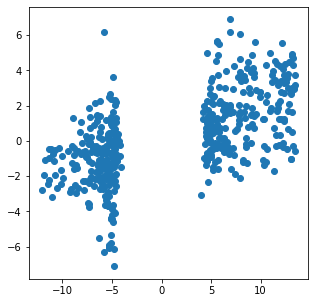

In [62]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}
    
    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb
    
    """
    if ax is None:
        ax = plt.gca()
    
    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, alpha=0.1, color='gray')
    return ax

from scipy import stats
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

x=coeqtl_df['MetaPZ_flippedforAF']
y=coeqtl_df['flipped_zscore_bios_flippedforAF']

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)     
# Statistics
n = y.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands
# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 5))
# Data
ax.scatter(
    x, y
)


# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)

<ipython-input-46-55674587bbd9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coeqtl_sig['celltype'] = celltype


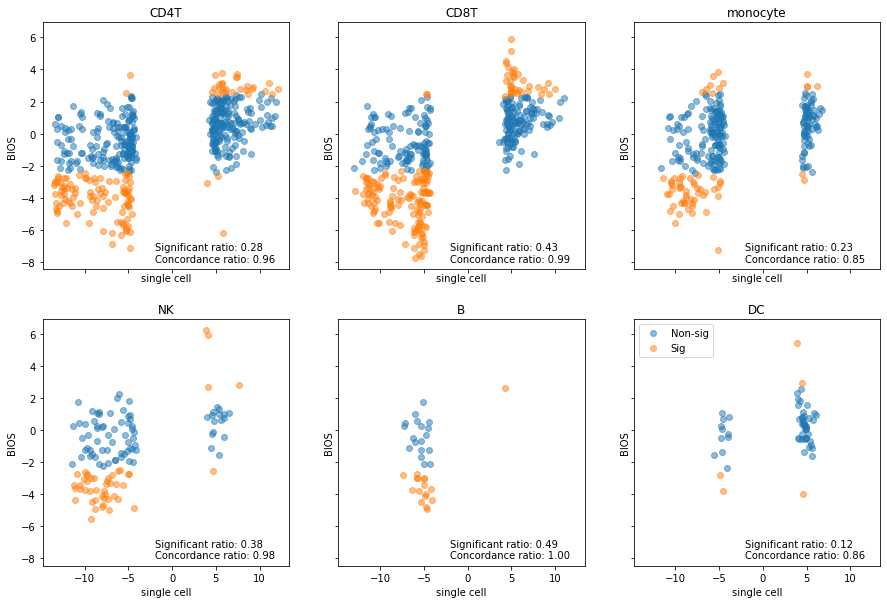

In [46]:
# withbiostechnicalandcelltypePICs
sig_df = pd.DataFrame()
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
celltypes = ['CD4T', 'CD8T', 'monocyte', 'NK', 'B', 'DC']
for i in range(2):
    for j in range(3):
        celltype = celltypes[i*3+j]
        coeqtl_df = pd.read_csv(
            coeqtl_withbios_prefix/filter_type/f'UT_{celltype}/coeqtls_fullresults_fixed.sig.withbiosonlyRNAAlignMetrics_rmLLD.tsv.gz',
            compression='gzip', index_col=0, sep='\t')
        coeqtl_df['zscore_bios'] = [get_z_score(item[0], item[1]) for item in 
                                    coeqtl_df[['t_bios', 
                                               'num_individuals_bios']].values]
        coeqtl_df['flipped_zscore_bios'] = [flip_direction(item[0], item[1], item[2]) for item in 
                                          coeqtl_df[['SNPEffectAllele', 
                                                     'assessed_allele_bios',
                                                     'zscore_bios']].values]
        # flip the direction according to AF
        coeqtl_df['eqtl_effect_allele'] = [eqtl_allele_af_dict.get(eqtl)['AlleleAssessed'] for eqtl in 
                                       coeqtl_df['snp_eqtlgene']]
        coeqtl_df['eqtl_alt_af'] = [eqtl_allele_af_dict.get(eqtl)['AF'] for eqtl in coeqtl_df['snp_eqtlgene']]
        coeqtl_df['eqtl_alt_allele'] = [eqtl_allele_af_dict.get(eqtl)['alt_allele'] for eqtl in 
                                            coeqtl_df['snp_eqtlgene']]
        coeqtl_df['eqtl_ref_allele'] = [eqtl_allele_af_dict.get(eqtl)['ref_allele'] for eqtl in 
                                            coeqtl_df['snp_eqtlgene']]
        coeqtl_df[f'MetaPZ_flippedforAF'] = [flip_zscore(zscore, coeqtlallele, altaf, altallele)
                                                           for zscore, coeqtlallele, altaf, altallele in
                                                           coeqtl_df[[f'MetaPZ',
                                                                          f'SNPEffectAllele',
                                                                          'eqtl_alt_af',
                                                                          'eqtl_alt_allele']].values]
        coeqtl_df[f'flipped_zscore_bios_flippedforAF'] = [flip_zscore(zscore, coeqtlallele, altaf, altallele)
                                                           for zscore, coeqtlallele, altaf, altallele in
                                                           coeqtl_df[[f'flipped_zscore_bios',
                                                                          f'SNPEffectAllele',
                                                                          'eqtl_alt_af',
                                                                          'eqtl_alt_allele']].values]
        ## end flip
        coeqtl_sig = coeqtl_df[coeqtl_df['corrected_p_bios']<=0.05]
        coeqtl_sig['celltype'] = celltype
        sig_df = pd.concat([coeqtl_sig, sig_df], axis=0)
        significant_ratio = coeqtl_sig.shape[0] / coeqtl_df.shape[0]
        coeqtl_sig_samedirection = coeqtl_sig[((coeqtl_sig['MetaPZ']>0) & (coeqtl_sig['flipped_zscore_bios']>0)) | 
                                              ((coeqtl_sig['MetaPZ']<0) & (coeqtl_sig['flipped_zscore_bios']<0))]
        consistent_ratio = coeqtl_sig_samedirection.shape[0] / coeqtl_sig.shape[0]
        # draw
        ax = axes[i][j]
        ax.scatter(coeqtl_df['MetaPZ'][coeqtl_df['corrected_p_bios']>0.05], 
                   coeqtl_df['flipped_zscore_bios'][coeqtl_df['corrected_p_bios']>0.05], alpha=0.5,
                   label='Non-sig')
        ax.scatter(coeqtl_df['MetaPZ'][coeqtl_df['corrected_p_bios']<=0.05],
                    coeqtl_df['flipped_zscore_bios'][coeqtl_df['corrected_p_bios']<=0.05], alpha=0.5,
                    label='Sig')
        ax.set_xlabel('single cell')
        ax.set_ylabel('BIOS')
        ax.set_title(celltype)
        ax.text(-2, -8, 
                f'Significant ratio: {significant_ratio:.2f}\nConcordance ratio: {consistent_ratio:.2f}')
ax.legend(loc='upper left')
        
# plt.savefig('bios_replication.filtered_results.scatterplots.pdf')
# plt.savefig('bios_replication.filtered_results.scatterplots.png')

<ipython-input-18-0693f2cb76ec>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coeqtl_sig['celltype'] = celltype


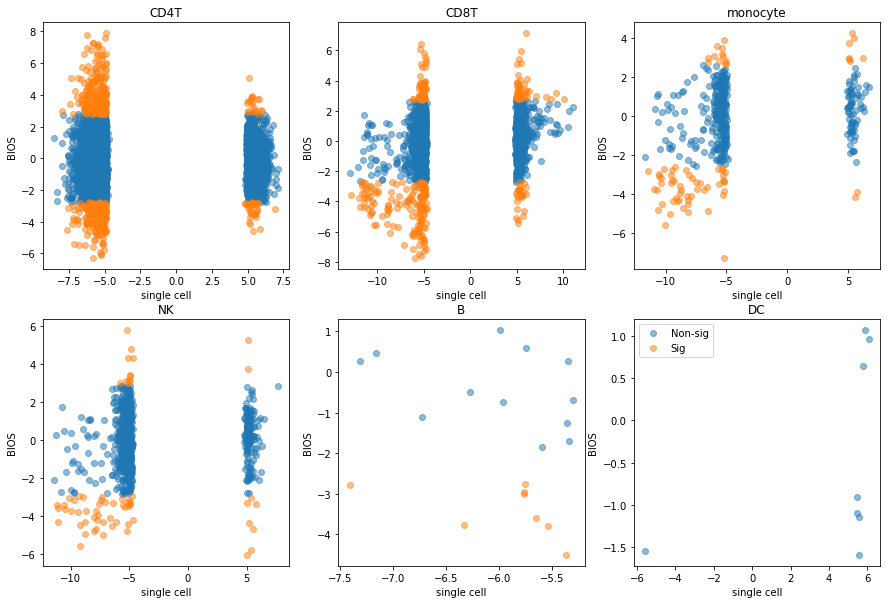

In [18]:
# unfiltered results 
# withbiosonlyRNAAlignMetrics_rmLLD
sig_df = pd.DataFrame()
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
celltypes = ['CD4T', 'CD8T', 'monocyte', 'NK', 'B', 'DC']
for i in range(2):
    for j in range(3):
        celltype = celltypes[i*3+j]
        coeqtl_df = pd.read_csv(
            coeqtl_withbios_prefix/'unfiltered_results'/f'UT_{celltype}/coeqtls_fullresults_fixed.sig.withbiosonlyRNAAlignMetrics_rmLLD.tsv.gz',
            compression='gzip', index_col=0, sep='\t')
        coeqtl_df['zscore_bios'] = [get_z_score(item[0], item[1]) for item in 
                                    coeqtl_df[['t_bios', 
                                               'num_individuals_bios']].values]
        coeqtl_df['flipped_zscore_bios'] = [flip_direction(item[0], item[1], item[2]) for item in 
                                          coeqtl_df[['SNPEffectAllele', 
                                                     'assessed_allele_bios',
                                                     'zscore_bios']].values]
        coeqtl_sig = coeqtl_df[coeqtl_df['corrected_p_bios']<=0.05]
        coeqtl_sig['celltype'] = celltype
        sig_df = pd.concat([coeqtl_sig, sig_df], axis=0)
        # draw
        ax = axes[i][j]
        ax.scatter(coeqtl_df['MetaPZ'][coeqtl_df['corrected_p_bios']>0.05], 
                   coeqtl_df['flipped_zscore_bios'][coeqtl_df['corrected_p_bios']>0.05], alpha=0.5,
                   label='Non-sig')
        ax.scatter(coeqtl_df['MetaPZ'][coeqtl_df['corrected_p_bios']<=0.05],
                    coeqtl_df['flipped_zscore_bios'][coeqtl_df['corrected_p_bios']<=0.05], alpha=0.5,
                    label='Sig')
        ax.set_xlabel('single cell')
        ax.set_ylabel('BIOS')
        ax.set_title(celltype)
ax.legend(loc='upper left')
# plt.savefig('bios_replication.unfiltered_results.scatterplots.pdf')
# plt.savefig('bios_replication.unfiltered_results.scatterplots.png', dpi=300)